<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#[Testing]-Tagging-keywords-extracted-from-reviews-using-keyword-semantic-similarity-and-separating-topics" data-toc-modified-id="[Testing]-Tagging-keywords-extracted-from-reviews-using-keyword-semantic-similarity-and-separating-topics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>[Testing] Tagging keywords extracted from reviews using keyword semantic similarity and separating topics</a></span><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Approach" data-toc-modified-id="Approach-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Approach</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Define-topics-and-keywords" data-toc-modified-id="Define-topics-and-keywords-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Define topics and keywords</a></span><ul class="toc-item"><li><span><a href="#Usage-subtopics" data-toc-modified-id="Usage-subtopics-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Usage subtopics</a></span></li><li><span><a href="#Feedback-subtopics" data-toc-modified-id="Feedback-subtopics-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Feedback subtopics</a></span></li></ul></li><li><span><a href="#Identify-keywords-from-opinion-units" data-toc-modified-id="Identify-keywords-from-opinion-units-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Identify keywords from opinion units</a></span></li><li><span><a href="#Select-labelled-data" data-toc-modified-id="Select-labelled-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Select labelled data</a></span></li><li><span><a href="#Identify-the-closest-subtopics-for-usage-and-product-feedback" data-toc-modified-id="Identify-the-closest-subtopics-for-usage-and-product-feedback-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Identify the closest subtopics for usage and product feedback</a></span><ul class="toc-item"><li><span><a href="#Usage" data-toc-modified-id="Usage-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Usage</a></span><ul class="toc-item"><li><span><a href="#Assess-results" data-toc-modified-id="Assess-results-1.7.1.1"><span class="toc-item-num">1.7.1.1&nbsp;&nbsp;</span>Assess results</a></span></li><li><span><a href="#Assess-max_usage" data-toc-modified-id="Assess-max_usage-1.7.1.2"><span class="toc-item-num">1.7.1.2&nbsp;&nbsp;</span>Assess max_usage</a></span></li></ul></li><li><span><a href="#Product-feedback-[to-be-put-as-part-of-the-dataframe]" data-toc-modified-id="Product-feedback-[to-be-put-as-part-of-the-dataframe]-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Product feedback [to be put as part of the dataframe]</a></span></li><li><span><a href="#Assess-results" data-toc-modified-id="Assess-results-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Assess results</a></span><ul class="toc-item"><li><span><a href="#Assess-max_feedback" data-toc-modified-id="Assess-max_feedback-1.7.3.1"><span class="toc-item-num">1.7.3.1&nbsp;&nbsp;</span>Assess max_feedback</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

# [Testing] Tagging keywords extracted from reviews using keyword semantic similarity and separating topics

## Purpose
In order to auto-tag user reviews, we choose to identify topics and sub topics that we would like to then automatically assign to the reviews. This post, 
[Best Practice for Tagging Customer Feedback](https://monkeylearn.com/blog/auto-tagging-customer-feedback-with-machine-learning/#Why-Great-Categorization-is-Important), provides us with recommendations on how to identify tags, how many we should use, and how to define them.

## Approach
What approach use when it comes to matching our opinion units with topics? This post,
[Approach to tag reviews](https://engineering.reviewtrackers.com/using-word2vec-to-classify-review-keywords-a5fa50ce05dc), recommends to first to extract keywords from reviews, and then use keyword semantic similarity. 
Two other options are introduced, but not recommended due to their limitations:
* keyword string similarity, as it's limited to character similarity, and does not take into account semantics
* topic modelling, as in particular they tend to produce rather abstract topics, and users cannot easily (re)define their topics.

Let's test tagging topics using similarity on keywords with a list of topics to check if we could use this method to identify topics automatically. 

## Import libraries

In [1]:
import os
import pandas as pd

In [2]:
import spacy
nlp = spacy.load('en_core_web_md')

In [3]:
from rake_nltk import Rake

In [4]:
import itertools
import numpy as np

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

## Define topics and keywords

In order to identify main topics from the app reviews, the best approach is to read part of them in order to grasp main topics. The definition of the topics is also based on the objectives for analysing app reviews.

The main topics identified are:
* Usage
    - Conditions
    - Family
    - Activities
    - Actions taken
    - Sources of pollution
* Product Feedback
    - Performance
    - Usability (Content, Navigation, Complexity)
    - Feature request
* Pricing

### Usage subtopics

In [6]:
usage_topic_labels = [
    'Conditions',
    'Family',
    'Activities',
    'Actions taken',
    'Sources of pollution'
]
len(usage_topic_labels)

5

In [7]:
usage_topic_keywords = [
    'sickness health COPD lung lungs disease condition chronic pneumonia asthma asthmatic breathing sensitive allergy sufferers allergies',
    'children baby infant pregnant',
    'outside outdoor sports dog leisure travel',
    'mask purifier window',
    'fire industry traffic burning'
]
len(usage_topic_keywords)

5

In [8]:
# Test if 'Covid' is part of the vocabulary 
doc = nlp(u'Covid')
print(doc[0].is_oov)

True


Covid is considered by some users as a kind of pollution. This word is not part of spacy medium vocabulary. Then, we don't include it in the keywords.

In [9]:
usage_topic_docs = list(nlp.pipe(usage_topic_keywords))

In [10]:
usage_topic_vectors = np.array([doc.vector
                         if doc.has_vector else spacy.vocab[0].vector 
                         for doc in usage_topic_docs])

In [11]:
cosine_similarity(usage_topic_vectors,usage_topic_vectors)

array([[0.99999976, 0.5412001 , 0.33091956, 0.32165882, 0.37364414],
       [0.5412001 , 1.        , 0.4376459 , 0.28052086, 0.30287555],
       [0.33091956, 0.4376459 , 1.        , 0.37760836, 0.5360609 ],
       [0.32165882, 0.28052086, 0.37760836, 1.        , 0.40927914],
       [0.37364414, 0.30287555, 0.5360609 , 0.40927914, 1.0000001 ]],
      dtype=float32)

Similarities are higher between 'Conditions' and 'Family', as well as between 'Activities' and 'Sources of pollution'. We'll check if this causes issues in assigning subtopics. 

### Feedback subtopics

In [12]:
feedback_topic_labels = [
    'Performance',
    'Usability - Content',
    'Usability - Navigation',
    'Usability - Complexity'
]
len(feedback_topic_labels)

4

In [13]:
feedback_topic_keywords = [
    'bug issues fix reliable accuracy performance',
    'content areas information location',
    'navigation design clear widget notification update refresh elegant arrow interface color UI interface',
    'easy complexity hard difficult'
]

In [14]:
feedback_topic_docs = list(nlp.pipe(feedback_topic_keywords))

In [15]:
feedback_topic_vectors = np.array([doc.vector
                         if doc.has_vector else spacy.vocab[0].vector 
                         for doc in feedback_topic_docs])

In [16]:
cosine_similarity(feedback_topic_vectors,feedback_topic_vectors)

array([[1.        , 0.5567984 , 0.5899744 , 0.6605333 ],
       [0.5567984 , 0.9999996 , 0.5600141 , 0.54211575],
       [0.5899744 , 0.5600141 , 0.9999998 , 0.50631595],
       [0.6605333 , 0.54211575, 0.50631595, 1.        ]], dtype=float32)

Similarities between subtopics are higher for 'Product feedback' than for 'Usage', especially between 'Performance' and 'Usability - Complexity'. We'll check if this causes issues in assigning subtopics. 

## Identify keywords from opinion units

In [17]:
# load dataset
path = os.getcwd()

subfolder = "/../data/3_tags_and_labels/"

filename = "opi_units_airvisual-air-quality-forecast_1048912974_with_tags3.csv"

In [18]:
df = pd.read_csv(path+subfolder+filename, sep = ";")

In [19]:
df.head()

,Unnamed: 0,opi_id,tag,subtag,opinion_unit,review_id,rating
0,0,0,Product feedback,Usability - Content,Happy to finally see when and why I ca n’t bre...,6121840341,5
1,1,1,Usage,Conditions,Having allergies is annoying,6121840341,5
2,2,2,Product feedback,Usability - Content,but I ’m glad to see this and know when to tak...,6121840341,5
3,3,3,NaN,NaN,Super,6114444527,5
4,4,4,Product feedback,Usability - Content,Easy to keep track on specific Local areas,6114444527,5


In [20]:
del df['Unnamed: 0']

In [21]:
def get_string_of_keywords(s):
    r = Rake()
    r.extract_keywords_from_text(s)
    r.get_ranked_phrases()
    k = ' '.join(i for i in r.get_ranked_phrases())
    return k

In [22]:
df['keywords'] = df['opinion_unit'].apply(get_string_of_keywords)

In [23]:
df.head()

,opi_id,tag,subtag,opinion_unit,review_id,rating,keywords
0,0,Product feedback,Usability - Content,Happy to finally see when and why I ca n’t bre...,6121840341,5,ca n ’ finally see happy breathe
1,1,Usage,Conditions,Having allergies is annoying,6121840341,5,annoying allergies
2,2,Product feedback,Usability - Content,but I ’m glad to see this and know when to tak...,6121840341,5,take extra precautions ’ see know glad
3,3,NaN,NaN,Super,6114444527,5,super
4,4,Product feedback,Usability - Content,Easy to keep track on specific Local areas,6114444527,5,specific local areas keep track easy


## Select labelled data 

100 opinion units of the dataset have been manually labelled. Corresponding columns are 'tag' and 'subtag'. The closest tag has been selected.

In [24]:
df_labelled = df.loc[df['tag'].notnull()].copy()

In [25]:
len(df_labelled)

100

In [26]:
get_keyword_doc = lambda s: nlp(s)

df_labelled['keyword_docs'] = df_labelled['keywords'].apply(get_keyword_doc)

In [27]:
def get_keywords_vectors(doc):
    return np.array(doc.vector
                            if doc.has_vector else spacy.vocab[0].vector)

In [28]:
df_labelled['keywords_vectors'] = df_labelled['keyword_docs'].apply(get_keywords_vectors)

In [29]:
df_labelled.head()

,opi_id,tag,subtag,opinion_unit,review_id,rating,keywords,keyword_docs,keywords_vectors
0,0,Product feedback,Usability - Content,Happy to finally see when and why I ca n’t bre...,6121840341,5,ca n ’ finally see happy breathe,"(ca, n, ’, finally, see, happy, breathe)","[0.08391357, 0.20251371, -0.2862253, -0.043673..."
1,1,Usage,Conditions,Having allergies is annoying,6121840341,5,annoying allergies,"(annoying, allergies)","[-0.61873996, 0.32149598, -0.712195, -0.058893..."
2,2,Product feedback,Usability - Content,but I ’m glad to see this and know when to tak...,6121840341,5,take extra precautions ’ see know glad,"(take, extra, precautions, ’, see, know, glad)","[0.023471432, 0.11869114, -0.25290745, 0.04725..."
4,4,Product feedback,Usability - Content,Easy to keep track on specific Local areas,6114444527,5,specific local areas keep track easy,"(specific, local, areas, keep, track, easy)","[0.17512538, 0.115311004, -0.327728, -0.007014..."
6,6,Product feedback,Usability - Content,Full of good information !,6114325210,5,good information full,"(good, information, full)","[-0.1368, 0.11253667, -0.275318, 0.13569666, -..."


## Identify the closest subtopics for usage and product feedback

Now that we have assessed our keyword vectors and our topic vectors, let's compute cosine similarity between them.
* We use the topic with the highest cosine similarity for each keyword vector to predict the topic of the corresponding opinion unit. 
* We compare the predicted topic with the subtag assigned manually.

### Usage

In [30]:
get_simple_sim_usage = lambda keywords_vectors: cosine_similarity(keywords_vectors.reshape(1, -1), usage_topic_vectors)[0]

df_labelled['simple_sim_usage'] = df_labelled['keywords_vectors'].apply(get_simple_sim_usage)

In [31]:
get_argmax = lambda arr: arr.argmax()

df_labelled['usage_topic_idx'] = df_labelled['simple_sim_usage'].apply(get_argmax)

In [32]:
df_labelled['max_usage'] = df_labelled['simple_sim_usage'].apply(max)

get_usage_topic_label = lambda i : usage_topic_labels[i]

In [33]:
df_labelled['predicted_usage_subtag'] = df_labelled['usage_topic_idx'].apply(get_usage_topic_label)

In [34]:
df_usage = df_labelled[df_labelled['tag']=='Usage']

df_usage.head()

,opi_id,tag,subtag,opinion_unit,review_id,rating,keywords,keyword_docs,keywords_vectors,simple_sim_usage,usage_topic_idx,max_usage,predicted_usage_subtag
1,1,Usage,Conditions,Having allergies is annoying,6121840341,5,annoying allergies,"(annoying, allergies)","[-0.61873996, 0.32149598, -0.712195, -0.058893...","[0.71190387, 0.42950535, 0.3107502, 0.34382185...",0,0.711904,Conditions
7,7,Usage,Actions taken,Great app for filtering the air,6111838742,5,great app filtering air,"(great, app, filtering, air)","[0.1210635, 0.49353254, 0.15498525, -0.0280847...","[0.34869528, 0.25612086, 0.4890231, 0.57062435...",3,0.570624,Actions taken
13,13,Usage,Conditions,I have asthma and have been using apps for yea...,6100238408,5,using apps years help asthma,"(using, apps, years, help, asthma)","[-0.034016002, 0.23273201, -0.270318, -0.03545...","[0.6481743, 0.50102544, 0.44598484, 0.41113862...",0,0.648174,Conditions
17,17,Usage,Activities,As a supervisor of people working outside this...,6085240577,5,people working outside app really helps superv...,"(people, working, outside, app, really, helps,...","[0.013566252, 0.10456099, -0.21478963, -0.0445...","[0.39057827, 0.42350024, 0.5765904, 0.4414309,...",4,0.599981,Sources of pollution
21,21,Usage,Activities,It helps me plan for outdoor activity,6075747590,5,outdoor activity plan helps,"(outdoor, activity, plan, helps)","[0.09537293, 0.15534401, -0.13979, -0.15383725...","[0.43357262, 0.4180805, 0.727675, 0.41266447, ...",2,0.727675,Activities


In [35]:
len(df_usage)

21

#### Assess results

In [36]:
from sklearn import metrics

In [37]:
print(metrics.confusion_matrix(df_usage['subtag'],df_usage['predicted_usage_subtag'], labels = usage_topic_labels))

[[9 0 0 0 0]
 [0 1 0 0 0]
 [0 0 4 0 1]
 [0 0 0 3 0]
 [0 0 1 0 2]]


In [38]:
for i in range(len(usage_topic_labels)):
    print(f'topic no:{i} - {usage_topic_labels[i]}')

topic no:0 - Conditions
topic no:1 - Family
topic no:2 - Activities
topic no:3 - Actions taken
topic no:4 - Sources of pollution


Most topics have been well identified: Only 2 were not correctly assigned.

#### Assess max_usage

In [39]:
df_usage['max_usage'].describe()

count    21.000000
mean      0.658167
std       0.093880
min       0.373710
25%       0.613859
50%       0.673021
75%       0.728016
max       0.762504
Name: max_usage, dtype: float64

In [40]:
match = df_usage.loc[df_usage['subtag']==df_usage['predicted_usage_subtag']].copy()

In [41]:
len(match)

19

In [42]:
match['max_usage'].describe()

count    19.000000
mean      0.676201
std       0.069036
min       0.531746
25%       0.631621
50%       0.699110
75%       0.728599
max       0.762504
Name: max_usage, dtype: float64

In [43]:
mismatch = df_usage.loc[df_usage['subtag']!=df_usage['predicted_usage_subtag']].copy()

In [44]:
len(mismatch)

2

In [45]:
mismatch['max_usage']

17    0.599981
24    0.373710
Name: max_usage, dtype: float64

In [46]:
mismatch

,opi_id,tag,subtag,opinion_unit,review_id,rating,keywords,keyword_docs,keywords_vectors,simple_sim_usage,usage_topic_idx,max_usage,predicted_usage_subtag
17,17,Usage,Activities,As a supervisor of people working outside this...,6085240577,5,people working outside app really helps superv...,"(people, working, outside, app, really, helps,...","[0.013566252, 0.10456099, -0.21478963, -0.0445...","[0.39057827, 0.42350024, 0.5765904, 0.4414309,...",4,0.599981,Sources of pollution
24,24,Usage,Sources of pollution,"I recomended for Covid 19 , it help .",6062264110,5,covid 19 recomended help,"(covid, 19, recomended, help)","[-0.033435006, 0.21342751, -0.0808075, -0.1200...","[0.29643124, 0.3549699, 0.37370953, 0.26612338...",2,0.373710,Activities


### Product feedback [to be put as part of the dataframe]

In [47]:
get_simple_sim_feedback = lambda keywords_vectors: cosine_similarity(keywords_vectors.reshape(1, -1), feedback_topic_vectors)[0]

df_labelled['simple_sim_feedback'] = df_labelled['keywords_vectors'].apply(get_simple_sim_feedback)

In [48]:
df_labelled['feedback_topic_idx'] = df_labelled['simple_sim_feedback'].apply(get_argmax)

In [49]:
df_labelled['max_feedback'] = df_labelled['simple_sim_feedback'].apply(max)

In [50]:
get_feedback_topic_label = lambda i : feedback_topic_labels[i]

df_labelled['predicted_feedback_subtag'] = df_labelled['feedback_topic_idx'].apply(get_feedback_topic_label)

In [51]:
df_feedback = df_labelled[df_labelled['tag']=='Product feedback']

In [52]:
df_feedback.head()

,opi_id,tag,subtag,opinion_unit,review_id,rating,keywords,keyword_docs,keywords_vectors,simple_sim_usage,usage_topic_idx,max_usage,predicted_usage_subtag,simple_sim_feedback,feedback_topic_idx,max_feedback,predicted_feedback_subtag
0,0,Product feedback,Usability - Content,Happy to finally see when and why I ca n’t bre...,6121840341,5,ca n ’ finally see happy breathe,"(ca, n, ’, finally, see, happy, breathe)","[0.08391357, 0.20251371, -0.2862253, -0.043673...","[0.40849745, 0.4876453, 0.46909958, 0.42598307...",1,0.487645,Family,"[0.48058966, 0.3963916, 0.433159, 0.59682834]",3,0.596828,Usability - Complexity
2,2,Product feedback,Usability - Content,but I ’m glad to see this and know when to tak...,6121840341,5,take extra precautions ’ see know glad,"(take, extra, precautions, ’, see, know, glad)","[0.023471432, 0.11869114, -0.25290745, 0.04725...","[0.4266458, 0.4819732, 0.5425776, 0.4053445, 0...",2,0.542578,Activities,"[0.55865645, 0.5336797, 0.43659568, 0.6602878]",3,0.660288,Usability - Complexity
4,4,Product feedback,Usability - Content,Easy to keep track on specific Local areas,6114444527,5,specific local areas keep track easy,"(specific, local, areas, keep, track, easy)","[0.17512538, 0.115311004, -0.327728, -0.007014...","[0.40528053, 0.36020732, 0.6553868, 0.43773523...",2,0.655387,Activities,"[0.6692453, 0.7961095, 0.5609059, 0.7434142]",1,0.796109,Usability - Content
6,6,Product feedback,Usability - Content,Full of good information !,6114325210,5,good information full,"(good, information, full)","[-0.1368, 0.11253667, -0.275318, 0.13569666, -...","[0.34896043, 0.3636061, 0.5529935, 0.42539868,...",2,0.552993,Activities,"[0.6405602, 0.7383908, 0.5316754, 0.64695334]",1,0.738391,Usability - Content
8,8,Product feedback,Usability - Content,Tells you everything you need to know about th...,6111838742,5,air around tells need know everything,"(air, around, tells, need, know, everything)","[0.084135, 0.31050768, -0.10508833, 0.00661181...","[0.40480316, 0.46816343, 0.58339614, 0.4942297...",4,0.626056,Sources of pollution,"[0.5873987, 0.55587596, 0.4421945, 0.6801777]",3,0.680178,Usability - Complexity


In [53]:
len(df_feedback)

75

### Assess results

In [54]:
from sklearn import metrics

In [55]:
print(metrics.confusion_matrix(df_feedback['subtag'],df_feedback['predicted_feedback_subtag'], labels = feedback_topic_labels))

[[21  7  2  6]
 [ 2  6  1  9]
 [ 0  0  5  9]
 [ 0  0  0  7]]


In [56]:
for i in range(len(feedback_topic_labels)):
    print(f'topic no:{i} - {feedback_topic_labels[i]}')

topic no:0 - Performance
topic no:1 - Usability - Content
topic no:2 - Usability - Navigation
topic no:3 - Usability - Complexity


In [57]:
print(metrics.classification_report(df_feedback['subtag'],df_feedback['predicted_feedback_subtag']))

                        precision    recall  f1-score   support

           Performance       0.91      0.58      0.71        36
Usability - Complexity       0.23      1.00      0.37         7
   Usability - Content       0.46      0.33      0.39        18
Usability - Navigation       0.62      0.36      0.45        14

              accuracy                           0.52        75
             macro avg       0.56      0.57      0.48        75
          weighted avg       0.69      0.52      0.55        75



Performance is bad for the prediction of subtopics related to "Product Feedback". 
Let's check if we could improve this result by setting a threshold on similarity scores.

#### Assess max_feedback

In [58]:
df_feedback = df_labelled.loc[df_labelled['tag']=='Product feedback'].copy()

In [59]:
df_feedback['max_feedback'].describe()

count    75.000000
mean      0.649322
std       0.090230
min       0.358285
25%       0.605884
50%       0.659952
75%       0.718129
max       0.796109
Name: max_feedback, dtype: float64

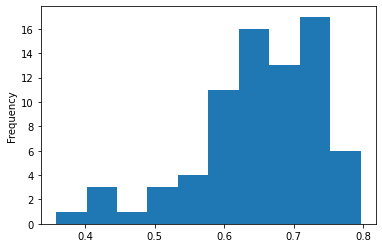

In [60]:
df_feedback['max_feedback'].plot.hist()

In [61]:
match = df_feedback.loc[df_feedback['subtag']==df_feedback['predicted_feedback_subtag']].copy()

In [62]:
len(match)

39

In [63]:
match['max_feedback'].describe()

count    39.000000
mean      0.650540
std       0.102322
min       0.358285
25%       0.623501
50%       0.671458
75%       0.720004
max       0.796109
Name: max_feedback, dtype: float64

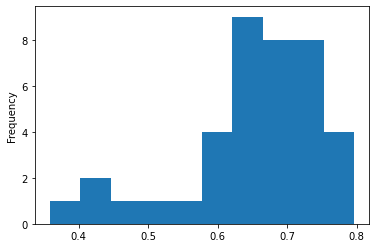

In [64]:
match['max_feedback'].plot.hist()

In [65]:
mismatch = df_feedback.loc[df_feedback['subtag']!=df_feedback['predicted_feedback_subtag']].copy()

In [66]:
len(mismatch)

36

In [67]:
mismatch['max_feedback'].describe()

count    36.000000
mean      0.648003
std       0.076438
min       0.431613
25%       0.597435
50%       0.657422
75%       0.714286
max       0.766354
Name: max_feedback, dtype: float64

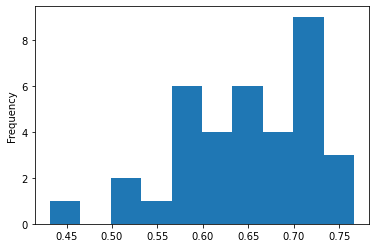

In [68]:
mismatch['max_feedback'].plot.hist()

It doesn't seem possible to set a threshold on similarity score to improve the performance of the classification. 

## Conclusion
* On the one hand, automatic topic assignment using keyword cosine similarity seems to provide good results for one of the topic, which is "Usage", as subtopics are quite separated one from another. We will later apply this method on the whole dataset and evaluate its performance.
* On the other hand, this method provides bad results for the topic "Product feedback". This is likely to be linked to the similarity of the subtopic vectors, which prevents from correctly separating different classes of opinion units. In order to build an automatic topic assignment, we'll test using keyword string similarity. 